In [114]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
import os
import requests #nos deja descargar toda la informacion de una página web
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Tablas de información de matrimonios y divocios a lo largo de las décadas

Un estudio de mujeres y hombres entre los 25-34 y 35-44 años

In [6]:
url5 = "https://github.com/resbaz/data/tree/master/marriage"
html5 = requests.get(url5).content #pedimos que nos dé el código dela página
file5 = "simbologia.csv" #hacemos la variable que va a contener ese nombre o en este caso documento
#os.path.isfile(file5) #te dice si existe aún o no la variable que pides en el mismo directorio
df5_list = pd.read_html(html5, header = 0)
df5 = df5_list[-1]
df5.to_csv(file5)
df5= pd.read_csv(file5)
#df5

Algo que nos interesa es conocer el número de matrimonios entre clases solciales.

In [7]:
url =[ "https://github.com/resbaz/data/blob/master/marriage/both_sexes.csv", 
      "https://github.com/resbaz/data/blob/master/marriage/divorce.csv",
      "https://github.com/resbaz/data/blob/master/marriage/men.csv",
     "https://github.com/resbaz/data/blob/master/marriage/women.csv"] #busca la página

labels = ['matrimonios','divorcios','men','women']#nombres de las tablas, debe coincidir el nombre con el ordel de los url



In [8]:
#url es un vector que contiene todos los links (entre comillas) de donde deseamos obtener las tablas
#"labels" es un vector que contiene los nombres de las tablas (entre comillas), debe coincidir el nombre de la tabla con el ordel de los url correspondiente
def html2csv(url,labels):
    
    #buscamos el iésimo argumento de "url" y le asignamos una variable a la tabla contenida en dicha página web.
    for i in range(len(url)):
        
        html = requests.get(url[i]).content #solicitamos el código fuente del url seleccionado
        tabla_datos = pd.read_html(html, header = 0) #el prefijo "pd" nos asegura que sólo leeremos el contenido que está en forma de tabla, "header" es el encabezado de la tabla o el renglón que indica a qué corresponde los datos
        globals()[labels[i]] = tabla_datos[0] #"globals()" convierte en variables a los argumentos de "labels", y estas variables temdrán como contenido las tablas. El valor de los corchetes puede variar entre 0 y -1
        globals()[labels[i]].to_csv(labels[i]+'.csv')  
    

In [9]:
marriage = pd.read_csv("matrimonios.csv")
marriages = marriage.set_index('year')

divorce = pd.read_csv('divorcios.csv')
divorces = divorce.set_index('year')

woman = pd.read_csv('women.csv')
women = woman.set_index('year')

man = pd.read_csv('men.csv')
men = man.set_index('year')

In [10]:
Mat_clases_soc = marriages[['poor_3544', 'mid_3544','rich_3544']]
Mat_clases_soc

,poor_3544,mid_3544,rich_3544
year,,,
1960,0.101975,0.047173,0.085539
1970,0.111755,0.045668,0.064992
1980,0.129143,0.050503,0.044460
1990,0.201221,0.090247,0.065739
2000,0.281314,0.128158,0.086220
2001,0.291911,0.132676,0.068033
2002,0.290430,0.137232,0.071534
2003,0.296769,0.137917,0.069490
2004,0.309346,0.141358,0.068312


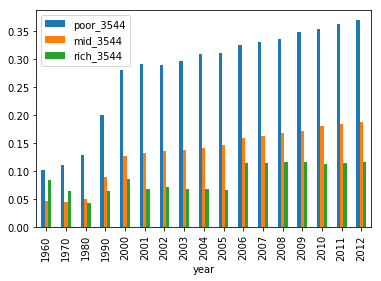

In [11]:
#Mat_clases_soc.plot()
#plt.bar(Mat_clases_soc.index, Mat_clases_soc['poor_3544'], width=0.8,data=Mat_clases_soc)
Mat_clases_soc.plot( y = ['poor_3544','mid_3544', 'rich_3544'], kind="bar")


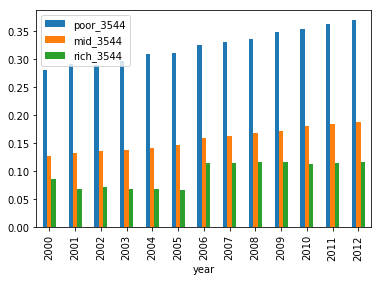

In [12]:
z = Mat_clases_soc.truncate(before=2000)
z.plot( y = ['poor_3544','mid_3544', 'rich_3544'], kind="bar")

Se casa más la población de bajos recursos que la que gente de clase económica alta.

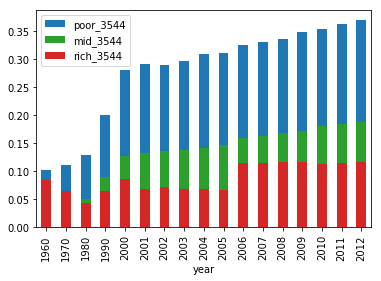

In [13]:
ax = Mat_clases_soc.plot( y="poor_3544", kind="bar")
Mat_clases_soc.plot( y="mid_3544", kind="bar", ax=ax, color="C2")
Mat_clases_soc.plot( y="rich_3544", kind="bar", ax=ax, color="C3")

plt.show()

También es de interés poder comprar el número de divorcios y matrimonios en base a la escolaridad.

In [23]:
div_esc = divorces[['HS_3544','HS_4554','SC_3544','SC_4554','BAp_3544','BAp_4554','BAo_3544','BAo_4554','GD_3544']]
marr_esc = marriages[['HS_3544','HS_4554','SC_3544','SC_4554','BAp_3544','BAp_4554','BAo_3544','BAo_4554','GD_3544']]

In [45]:
#ecolaridad = marr_esc.append(div_esc) 
ecolaridad = pd.merge(div_esc, marr_esc, on = 'year')
#ecolaridad

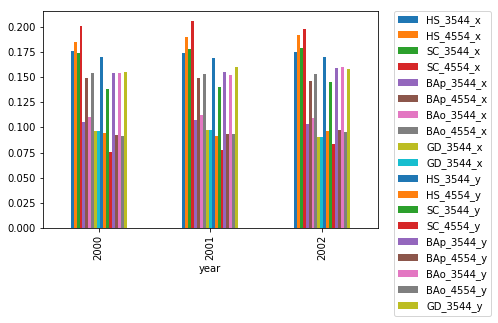

In [43]:
z1 = ecolaridad.truncate(before=2000, after=2002)
z1.plot( y = ['HS_3544_x','HS_4554_x','SC_3544_x','SC_4554_x','BAp_3544_x','BAp_4554_x','BAo_3544_x','BAo_4554_x','GD_3544_x','GD_3544_x','HS_3544_y','HS_4554_y','SC_3544_y','SC_4554_y','BAp_3544_y','BAp_4554_y','BAo_3544_y','BAo_4554_y','GD_3544_y'], kind="bar")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

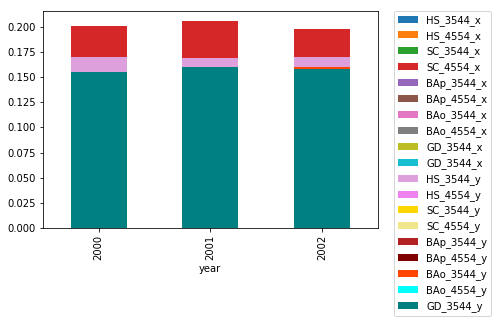

In [44]:
ax = z1.plot( y='HS_3544_x', kind="bar")
z1.plot( y='HS_4554_x', kind="bar", ax = ax, color = 'C1')
z1.plot( y='SC_3544_x', kind="bar", ax = ax, color = 'C2')
z1.plot( y='SC_4554_x', kind="bar",ax = ax, color = 'C3')
z1.plot( y='BAp_3544_x', kind="bar",ax = ax, color = 'C4')
z1.plot( y='BAp_4554_x', kind="bar",ax = ax, color = 'C5')
z1.plot( y='BAo_3544_x', kind="bar",ax = ax, color = 'C6')
z1.plot( y='BAo_4554_x', kind="bar", ax = ax, color = 'C7')
z1.plot( y='GD_3544_x', kind="bar",ax = ax, color = 'C8')
z1.plot( y='GD_3544_x', kind="bar",ax = ax, color = 'C9')
z1.plot( y='HS_3544_y', kind="bar", ax = ax, color = 'plum')
z1.plot( y='HS_4554_y', kind="bar", ax = ax, color = 'violet')
z1.plot( y='SC_3544_y', kind="bar", ax = ax, color = 'gold')
z1.plot( y='SC_4554_y', kind="bar", ax = ax, color = 'khaki')
z1.plot( y='BAp_3544_y', kind="bar", ax = ax, color = 'firebrick')
z1.plot( y='BAp_4554_y', kind="bar", ax = ax, color = 'maroon')
z1.plot( y='BAo_3544_y', kind="bar", ax = ax, color = 'orangered')
z1.plot( y='BAo_4554_y', kind="bar", ax = ax, color = 'cyan')
z1.plot( y='GD_3544_y', kind="bar", ax = ax, color = 'teal')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

In [52]:
all_men = men[['all_2534','all_3544','all_4554']]
all_men.style.set_caption('Hombres casados')
all_women = women[['all_2534','all_3544','all_4554']]
all_women.style.set_caption('Mujeres casadas')


,all_2534,all_3544,all_4554
year,,,
1960,0.085942,0.059352,0.070916
1970,0.099978,0.056618,0.055023
1980,0.161973,0.060851,0.046067
1990,0.244481,0.097163,0.054240
2000,0.297561,0.133991,0.079622
2001,0.306707,0.136650,0.082189
2002,0.310739,0.139652,0.084953
2003,0.317093,0.141589,0.089503
2004,0.324482,0.143623,0.093836


,all_2534,all_3544,all_4554
year,,,
1960,0.162455,0.082435,0.074231
1970,0.155409,0.078710,0.064729
1980,0.237300,0.077163,0.059458
1990,0.349195,0.126991,0.064975
2000,0.391913,0.178445,0.096804
2001,0.399740,0.176937,0.094608
2002,0.396965,0.180455,0.101137
2003,0.407330,0.180870,0.104794
2004,0.410667,0.187378,0.108959


C:\Users\Dea\Documents\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Dea\Documents\anaconda\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Dea\Documents\anaconda\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


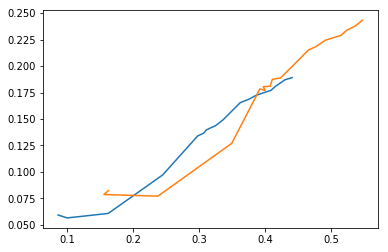

In [54]:
fig = plt.figure()

for frame in [all_women, all_men]:
    plt.plot(frame['all_2534'], frame['all_3544'])
    
plt.show()
